## Bussiness Problem
1. IMDb Movie Award membuat segmen acara khusus untuk memberi penghargaan perfilman pada tahun 1990-1999. Tim produksi membutuhkan daftar 5 nominasi dan 1 pemenang untuk masing-masing kategori penghargaan utama, yaitu Aktor
Terbaik Tahun 90an dan Aktris Terbaik Tahun 90an.
2. IMDb Movie Award pada puncak acaranya membuat segmen spesial berupa penghargaan dengan kategori Aktor Legenda Abad Ini. Nominasi dan pemenang penghargaan ini setidaknya harus memenuhi 3 kriteria berikut: telah berkarir dalam waktu yang lama, telah berakting di banyak film dengan rating yang baik. Tim produksi membutuhkan daftar 3 nominasi dan 1 pemenang untuk penghargaan pada kategori tersebut.

In [ ]:
!pip3 install mysql-connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 69.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp39-cp39-linux_x86_64.whl size=247964 sha256=0ce82af52f33fb94601211ae79714c13a0ccf883b256f6185f40f1dae5a98121
  Stored in directory: /root/.cache/pip/wheels/7b/14/39/5aad423666e827dfe9a1fbcd111ac17171e7c9865d570780ce
Successfully built mysql-connector


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def que(query, engine):
    df = pd.read_sql(query, engine)
    return df

In [ ]:
username = 'guest'
password = 'relational'
host = 'relational.fit.cvut.cz'
database = 'imdb_ijs'

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")

## Data Collection

In [ ]:
# check tables
query='''
    show tables
'''

que(query, engine)

,Tables_in_imdb_ijs
0,actors
1,directors
2,directors_genres
3,movies
4,movies_directors
5,movies_genres
6,roles


In [ ]:
# print first 5 rows of each tables
query='''
    show tables
'''

tables = que(query, engine)

for i in tables.Tables_in_imdb_ijs:
  query='''
      select * from ''' + i + '''
      limit 5

  '''

  print('TABLE:', i)
  print(que(query, engine))
  print()

TABLE: actors
   id first_name           last_name gender
0   2    Michael  'babeepower' Viera      M
1   3       Eloy         'Chincheta'      M
2   4   Dieguito         'El Cigala'      M
3   5    Antonio    'El de Chipiona'      M
4   6       José        'El Francés'      M

TABLE: directors
   id first_name    last_name
0   1       Todd            1
1   2        Les  12 Poissons
2   3    Lejaren     a'Hiller
3   4       Nian            A
4   5   Khairiya    A-Mansour

TABLE: directors_genres
   director_id        genre  prob
0            2        Short   1.0
1            3        Drama   1.0
2            5  Documentary   1.0
3            6        Drama   1.0
4            6        Short   1.0

TABLE: movies
   id                                 name  year  rank
0   0                                  #28  2002   NaN
1   1  #7 Train: An Immigrant Journey, The  2000   NaN
2   2                                    $  1971   6.4
3   3                        $1,000 Reward  1913   NaN
4   4

Terdapat 7 tabel yang memiliki beragam data dan tipe data

In [ ]:
# cek gender pada data actors
query='''
    select gender, COUNT(*)
    from actors
    GROUP BY gender
'''

que(query, engine)

,gender,COUNT(*)
0,F,304412
1,M,513306


hanya terdapat 2 gender

dari data diatas didapatkan 2 data pada gender tidak ada anomali pada data ini

In [ ]:
#query untuk mengetahui film dan genrenya
query='''
    select m.name as movie_name, m.id as movie_id,  mg.genre as movie_genre
    from movies m
      left join movies_genres mg on mg.movie_id = m.id
    ORDER BY m.name DESC
'''

que(query, engine)


,movie_name,movie_id,movie_genre
0,[Insert Title Here],3316,Short
1,[E]vangelion,3315,Action
2,[E]vangelion,3315,Sci-Fi
3,[E]vangelion,3315,Thriller
4,Zzzzzzzzzz: John Doel Portrait of a Sleepologist,376547,Comedy
...,...,...,...
532241,arkadas,378592,Romance
532242,apkin gelin,378606,Romance
532243,a Maior,377603,Comedy
532244,51 StGB,376765,None


Dari data frame diatas disimpulkan bahwa beberapa film memiliki lebih dari satu genre

In [ ]:
# query untuk mengetahui film dan genrenya
query='''
    select m.name as movie_name, m.id as movie_id, COUNT(DISTINCT mg.genre) as genre_jumlah
    from movies m
      left join movies_genres mg on mg.movie_id = m.id
    GROUP BY m.id, m.name
    ORDER BY COUNT(DISTINCT mg.genre) DESC
'''

que(query, engine)


,movie_name,movie_id,genre_jumlah
0,Finaru fuantaj VI,122529,11
1,Final Fantasy VII,113329,10
2,Utopia's Redemption,349066,9
3,Vampire Hunter D,350189,9
4,Sholay,299603,8
...,...,...,...
388264,Fereshteh vahshi,111307,0
388265,Pratishodh,262475,0
388266,Wreckage,368793,0
388267,"Hrdinov, na kter nezbyl cas",151850,0


dari data diatas diketahui bahwa dalam satu film terdiri dari beberapa genre

In [ ]:
# cek gender pada director dan nama film
query='''
    select m.name as movie_name, m.year as movie_year, m.id as movie_id, m.rank as movie_rating, md.director_id, concat(d.first_name,' ',d.last_name) as director_name
    from movies m
      left join movies_directors md on md.movie_id = m.id
      left join directors d on d.id = md.director_id
'''

sm=que(query, engine)
sm

,movie_name,movie_year,movie_id,movie_rating,director_id,director_name
0,#28,2002,0,NaN,38057.0,Jeff Jingle
1,"#7 Train: An Immigrant Journey, The",2000,1,NaN,60728.0,Hye Jung Park
2,"#7 Train: An Immigrant Journey, The",2000,1,NaN,77912.0,J.T. Takagi
3,$,1971,2,6.4,9970.0,Richard (I) Brooks
4,"$1,000 Reward",1913,3,NaN,NaN,None
...,...,...,...,...,...,...
443742,"""rgammk""",1995,412317,NaN,42605.0,Peter Kozma
443743,"""rgammk""",1995,412317,NaN,75198.0,Péter Soós
443744,"""zgnm Leyla""",2002,412318,NaN,890.0,Taner Akvardar
443745,""" Istanbul""",1983,412319,NaN,80751.0,Feyzi Tuna


In [ ]:
sm.dropna(inplace=True)

In [ ]:
sm[sm.duplicated(keep=False)]

,movie_name,movie_year,movie_id,movie_rating,director_id,director_name


In [ ]:
sm[sm.duplicated(subset=['movie_id', 'movie_name', 'movie_year', 'movie_rating'], keep=False)].sort_values(by='movie_id',ascending=True, kind='mergesort')

,movie_name,movie_year,movie_id,movie_rating,director_id,director_name
56,'A' gai waak,1983,52,7.2,13407.0,Jackie (I) Chan
57,'A' gai waak,1983,52,7.2,35973.0,Sammo Hung Kam-Bo
122,"'High Sign', The",1921,121,7.7,14954.0,Edward F. Cline
123,"'High Sign', The",1921,121,7.7,40188.0,Buster Keaton
267,'Til We Meet Again,1940,264,6.3,29889.0,Edmund Goulding
...,...,...,...,...,...,...
378069,nibus 174,2002,378148,8.1,60108.0,José Padilha
378142,lm savasisi,1984,378221,9.7,2786.0,Cüneyt Arkin
378143,lm savasisi,1984,378221,9.7,36607.0,Çetin Inanç
378515,vegtigris,2001,378583,8.7,39491.0,Iván Kapitány


dari data diatas diketahui bahwa beberapa film memiliki lebih dari satu sutradara

In [ ]:
tmp = sm[['movie_id', 'movie_name']].drop_duplicates()
tmp = tmp[tmp.duplicated(subset=['movie_name'], keep=False)]
tmp

,movie_id,movie_name
705,675,100 Days
706,676,100 Days
1159,1144,15 Minutes
1160,1145,15 Minutes
1380,1378,1919
...,...,...
375709,375899,Zorro Rides Again
377489,377585,pericoloso sporgersi
377490,377586,pericoloso sporgersi
377880,377960,"trangers, Les"


In [ ]:
sm[sm['movie_name'].isin(tmp['movie_name'])]

,movie_name,movie_year,movie_id,movie_rating,director_id,director_name
705,100 Days,1991,675,5.9,28286.0,Partho Ghosh
706,100 Days,2001,676,6.4,35849.0,Nick (I) Hughes
1159,15 Minutes,1999,1144,5.1,71504.0,Mark F. Schwartz
1160,15 Minutes,2001,1145,6.1,34148.0,John (I) Herzfeld
1380,1919,1985,1378,4.8,9865.0,Hugh Brody
...,...,...,...,...,...,...
375710,Zorro Rides Again,1959,375899,6.9,86170.0,William Witney
377489,pericoloso sporgersi,1984,377585,5.6,81789.0,Jaco van Dormael
377490,pericoloso sporgersi,1994,377586,6.3,12055.0,Nae Caranfil
377880,"trangers, Les",1969,377960,6.7,19656.0,Jean-Pierre Desagnat


Dari data diatas didapatkan bahwa beberapa film memiliki kesamaan nama namun memiliki perbedaan tahun, dari hal tersebut memungkinkan bahwa film tersebut adalah seri lain atau seri lanjutan dari satu latar belakang yang sama. Terdapat pula perbedaan diantara judul yang sama yaitu tahun dan id film sehingga id dan tahun film diperlukan untuk dijadikan pembeda.

In [ ]:
# query untuk mengambil data yang akan dianalisis
query='''
    select a.id as actress_id, concat(a.first_name," ", a.last_name) as actress_name, m.name as movie_name, m.year as movie_year, m.id as movie_id, m.rank as movie_rating, a.gender as gender
    from actors a
      left join roles r on r.actor_id = a.id
      left join movies m on m.id = r.movie_id
      left join movies_genres mg on mg.movie_id = m.id
    where a.gender="F" AND m.year between 1990 AND 1999
'''

df=que(query, engine)
df

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
0,632759,Sara (I) Gilbert,$30,1999,15,7.5,F
1,632759,Sara (I) Gilbert,$30,1999,15,7.5,F
2,554956,Veva K. Bissonnette,"$40,000",1996,18,9.6,F
3,555141,Carol Bjorkman,"$40,000",1996,18,9.6,F
4,560739,Cynthia Boyd,"$40,000",1996,18,9.6,F
...,...,...,...,...,...,...,...
382884,613290,Alexa Eordogh,"""rgammk""",1995,412317,NaN,F
382885,657249,Aniko Horvath,"""rgammk""",1995,412317,NaN,F
382886,806565,Ildikó (III) Szabó,"""rgammk""",1995,412317,NaN,F
382887,806829,Andrea Szulak,"""rgammk""",1995,412317,NaN,F


Diambil beberapa kolom data untuk nantinya akan dilakukan analisis yang dinilai memiliki hubungan terhadap rating pada film tersebut. Dalam satu film juga diperankan oleh beberapa actress dalam satu database

In [ ]:
# query untuk mengambil data yang akan dianalisis
query='''
    select a.id as actress_id, concat(a.first_name," ", a.last_name) as actress_name, m.name as movie_name, m.year as movie_year, m.id as movie_id, m.rank as movie_rating, a.gender as gender
    from actors a
      left join roles r on r.actor_id = a.id
      left join movies m on m.id = r.movie_id
      left join movies_genres mg on mg.movie_id = m.id
    where a.gender="M" AND m.year between 1990 AND 1999
'''

dm=que(query, engine)
dm

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
0,223733,Gregory Itzin,$30,1999,15,7.5,M
1,289908,Erik MacArthur,$30,1999,15,7.5,M
2,223733,Gregory Itzin,$30,1999,15,7.5,M
3,289908,Erik MacArthur,$30,1999,15,7.5,M
4,3373,Michael Agbabian,"$40,000",1996,18,9.6,M
...,...,...,...,...,...,...,...
741675,200469,Péter Haumann,"""rgammk""",1995,412317,NaN,M
741676,207013,Zoltán Hetenyi,"""rgammk""",1995,412317,NaN,M
741677,327016,David Monoki,"""rgammk""",1995,412317,NaN,M
741678,463125,Gyula Szombathy,"""rgammk""",1995,412317,NaN,M


diambil beberapa kolom data untuk nantinya akan dilakukan analisis yang dinilai memiliki hubungan terhadap rating pada film tersebut. Dalam satu film juga diperankan oleh beberapa actress dalam satu database

In [ ]:
# query untuk mengambil data yang akan dianalisis soal 2
query='''
    select a.id as actress_id, concat(a.first_name," ", a.last_name) as actress_name, m.name as movie_name, m.year as movie_year, m.id as movie_id, m.rank as movie_rating, a.gender as gender
    from actors a
      left join roles r on r.actor_id = a.id
      left join movies m on m.id = r.movie_id
      left join movies_genres mg on mg.movie_id = m.id
    where a.gender="M"
'''

dmsoal2=que(query, engine)
dmsoal2

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
0,2,Michael 'babeepower' Viera,Rock Steady,2002,280088,NaN,M
1,2,Michael 'babeepower' Viera,"""Lyricist Lounge Show, The""",2000,396232,NaN,M
2,3,Eloy 'Chincheta',Ja me maaten...!,2000,376687,2.1,M
3,4,Dieguito 'El Cigala',Torrente 2: Misin en Marbella,2001,336265,5.9,M
4,4,Dieguito 'El Cigala',Torrente 2: Misin en Marbella,2001,336265,5.9,M
...,...,...,...,...,...,...,...
3397064,528783,Hakan Þükür,Eski aik sari desene,2003,103585,5.0,M
3397065,528784,Dánjal D. á Neystabø,Bye Bye Blue Bird,1999,50977,6.0,M
3397066,528784,Dánjal D. á Neystabø,Bye Bye Blue Bird,1999,50977,6.0,M
3397067,528785,Gudmundur Ómar þráinsson,"Viking Sagas, The",1995,354334,4.6,M


## Data Cleaning

In [ ]:
df.isna().sum()

actress_id           0
actress_name         0
movie_name           0
movie_year           0
movie_id             0
movie_rating    204011
gender               0
dtype: int64

In [ ]:
dm.isna().sum()

actress_id           0
actress_name         0
movie_name           0
movie_year           0
movie_id             0
movie_rating    358960
gender               0
dtype: int64

In [ ]:
dmsoal2.isna().sum()

actress_id            0
actress_name          0
movie_name            0
movie_year            0
movie_id              0
movie_rating    1803433
gender                0
dtype: int64

dari data di atas terdapat data nulls pada `movie_rating` sehingga kita tidak bisa menidentifikasi rating dari film tersebut. Data nulls atau data yang tidak ada harus dihapus untuk mempermudah proses analisis

In [ ]:
df.dropna(inplace=True)

In [ ]:
dm.dropna(inplace=True)

In [ ]:
dmsoal2.dropna(inplace=True)

In [ ]:
df.isna().sum()

actress_id      0
actress_name    0
movie_name      0
movie_year      0
movie_id        0
movie_rating    0
gender          0
dtype: int64

In [ ]:
dm.isna().sum()

actress_id      0
actress_name    0
movie_name      0
movie_year      0
movie_id        0
movie_rating    0
gender          0
dtype: int64

In [ ]:
dmsoal2.isna().sum()

actress_id      0
actress_name    0
movie_name      0
movie_year      0
movie_id        0
movie_rating    0
gender          0
dtype: int64

Data nulls sudah dihilangkan dari tabel data sehingga tidak mengganggu proses analisis

In [ ]:
df.head()

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
0,632759,Sara (I) Gilbert,$30,1999,15,7.5,F
1,632759,Sara (I) Gilbert,$30,1999,15,7.5,F
2,554956,Veva K. Bissonnette,"$40,000",1996,18,9.6,F
3,555141,Carol Bjorkman,"$40,000",1996,18,9.6,F
4,560739,Cynthia Boyd,"$40,000",1996,18,9.6,F


In [ ]:
dm.head()

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
0,223733,Gregory Itzin,$30,1999,15,7.5,M
1,289908,Erik MacArthur,$30,1999,15,7.5,M
2,223733,Gregory Itzin,$30,1999,15,7.5,M
3,289908,Erik MacArthur,$30,1999,15,7.5,M
4,3373,Michael Agbabian,"$40,000",1996,18,9.6,M


In [ ]:
dmsoal2.head()

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
2,3,Eloy 'Chincheta',Ja me maaten...!,2000,376687,2.1,M
3,4,Dieguito 'El Cigala',Torrente 2: Misin en Marbella,2001,336265,5.9,M
4,4,Dieguito 'El Cigala',Torrente 2: Misin en Marbella,2001,336265,5.9,M
8,6,José 'El Francés',Alma gitana,1996,12083,5.9,M
9,6,José 'El Francés',Alma gitana,1996,12083,5.9,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178878 entries, 0 to 336006
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   actress_id    178878 non-null  int64  
 1   actress_name  178878 non-null  object 
 2   movie_name    178878 non-null  object 
 3   movie_year    178878 non-null  int64  
 4   movie_id      178878 non-null  int64  
 5   movie_rating  178878 non-null  float64
 6   gender        178878 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.9+ MB


In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382720 entries, 0 to 671999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   actress_id    382720 non-null  int64  
 1   actress_name  382720 non-null  object 
 2   movie_name    382720 non-null  object 
 3   movie_year    382720 non-null  int64  
 4   movie_id      382720 non-null  int64  
 5   movie_rating  382720 non-null  float64
 6   gender        382720 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 23.4+ MB


In [ ]:
dmsoal2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593636 entries, 2 to 3397068
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   actress_id    1593636 non-null  int64  
 1   actress_name  1593636 non-null  object 
 2   movie_name    1593636 non-null  object 
 3   movie_year    1593636 non-null  int64  
 4   movie_id      1593636 non-null  int64  
 5   movie_rating  1593636 non-null  float64
 6   gender        1593636 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 97.3+ MB


In [ ]:
df['movie_year'].unique()

array([1999, 1996, 1994, 1995, 1997, 1991, 1990, 1998, 1992, 1993])

In [ ]:
dm['movie_year'].unique()

array([1999, 1996, 1994, 1995, 1997, 1991, 1990, 1998, 1992, 1993])

In [ ]:
dmsoal2_dup['movie_year'].unique()

array([2000, 2001, 1996, 1977, 1978, 1975, 2002, 1958, 1960, 1984, 1993,
       2003, 1994, 1935, 1983, 1969, 2004, 1972, 1999, 1995, 1987, 1998,
       1985, 1948, 1931, 1938, 1962, 1976, 1944, 1953, 1982, 1954, 1980,
       1990, 1955, 1952, 1956, 1963, 1997, 1965, 1986, 1939, 1946, 1949,
       1961, 1966, 1979, 1988, 1968, 1957, 1959, 1973, 1981, 1970, 1971,
       1992, 1989, 1991, 1964, 1936, 1926, 1928, 1923, 1945, 1903, 1901,
       1967, 1974, 1937, 1941, 1951, 1942, 1915, 1919, 1950, 1943, 1947,
       1940, 1934, 1930, 1929, 1922, 1924, 1921, 1927, 1932, 1914, 1933,
       1918, 1909, 1925, 1917, 1912, 1908, 1920, 1916, 1911, 1890, 1898,
       1902, 1913, 1910, 1894, 1900, 1906, 1899, 1895, 1905, 1896, 1891,
       1892, 1897, 1907, 1893, 1904])

dari data diatas didapatkan bahwa tahun untuk bussiness statement ke-1 hanya dari 1990-1999 sedangkan untuk bussines statement ke-2 memiliki tahun dengan jumlah yang banyak dan tahun yang lama

<AxesSubplot:>

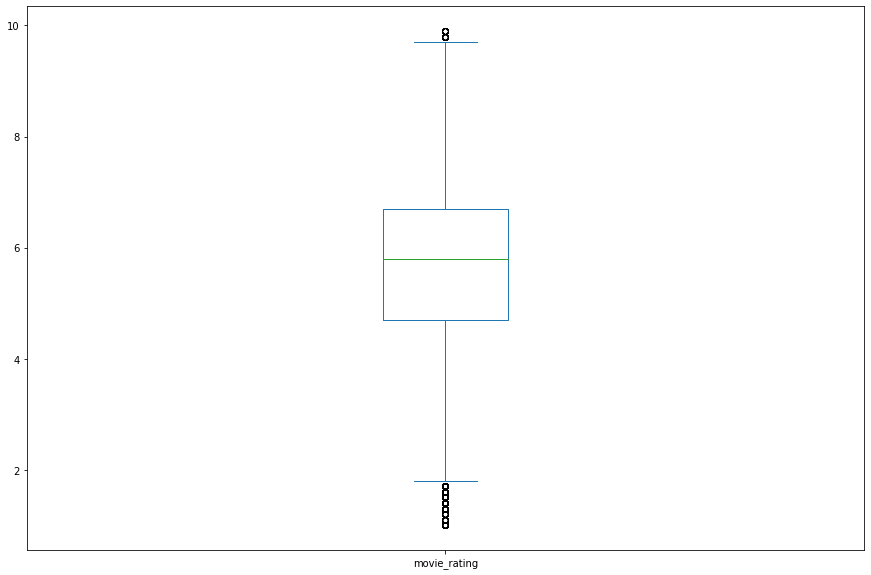

In [ ]:
df['movie_rating'].plot.box(figsize=(15,10))

<AxesSubplot:>

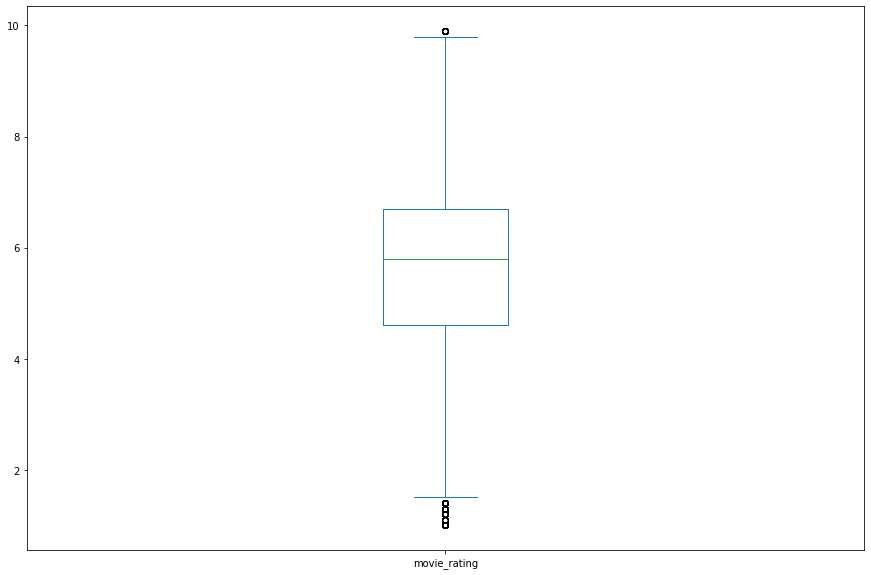

In [ ]:
dm['movie_rating'].plot.box(figsize=(15,10))

<AxesSubplot:>

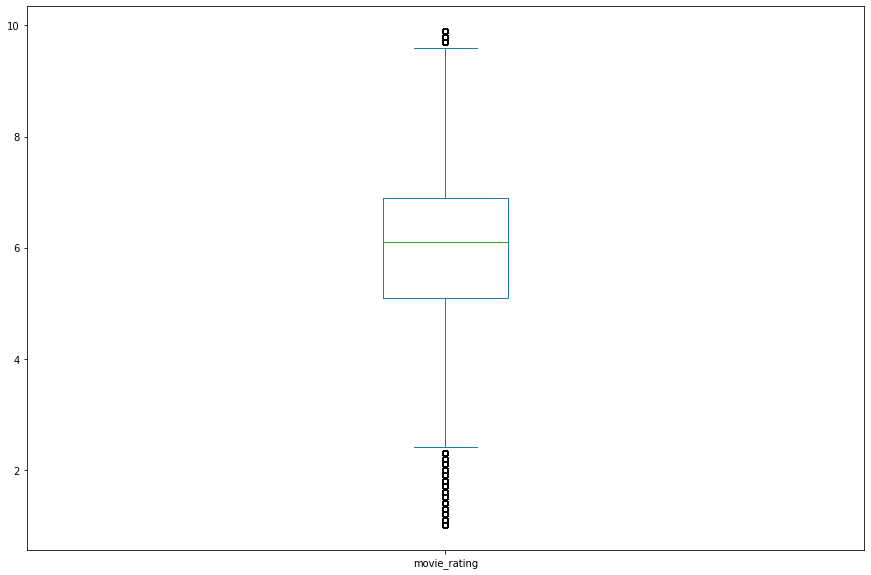

In [ ]:
dmsoal2['movie_rating'].plot.box(figsize=(15,10))

In [ ]:
df['movie_rating'].describe()

count    178878.000000
mean          5.616779
std           1.470787
min           1.000000
25%           4.700000
50%           5.800000
75%           6.700000
max           9.900000
Name: movie_rating, dtype: float64

In [ ]:
dm['movie_rating'].describe()

count    382720.000000
mean          5.627039
std           1.479819
min           1.000000
25%           4.600000
50%           5.800000
75%           6.700000
max           9.900000
Name: movie_rating, dtype: float64

In [ ]:
dmsoal2['movie_rating'].describe()

count    1.593636e+06
mean     5.921275e+00
std      1.436142e+00
min      1.000000e+00
25%      5.100000e+00
50%      6.100000e+00
75%      6.900000e+00
max      9.900000e+00
Name: movie_rating, dtype: float64

Untuk Bussiness statement yang ke-2 data lebih besar jumlahnya dibandingkan jumlah data untuk statement bussines ke-1

In [ ]:
df[df.duplicated(keep=False)]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
0,632759,Sara (I) Gilbert,$30,1999,15,7.5,F
1,632759,Sara (I) Gilbert,$30,1999,15,7.5,F
74,532914,Oumou Alghabid,"'Imhar', une lgende",1997,130,6.9,F
75,662691,Rhali Ixa,"'Imhar', une lgende",1997,130,6.9,F
76,532914,Oumou Alghabid,"'Imhar', une lgende",1997,130,6.9,F
...,...,...,...,...,...,...,...
335883,784671,Lise Schrøder,rnens je,1997,378334,6.6,F
335884,555120,Maj Bockhahn Bjerregaard,rnens je,1997,378334,6.6,F
335885,784671,Lise Schrøder,rnens je,1997,378334,6.6,F
335886,555120,Maj Bockhahn Bjerregaard,rnens je,1997,378334,6.6,F


In [ ]:
dm[dm.duplicated(keep=False)]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
0,223733,Gregory Itzin,$30,1999,15,7.5,M
1,289908,Erik MacArthur,$30,1999,15,7.5,M
2,223733,Gregory Itzin,$30,1999,15,7.5,M
3,289908,Erik MacArthur,$30,1999,15,7.5,M
191,1075,Atibou Aboubacar,"'Imhar', une lgende",1997,130,6.9,M
...,...,...,...,...,...,...,...
671723,410706,Folmer Rubæk,rnens je,1997,378334,6.6,M
671724,413323,Peter Rygaard,rnens je,1997,378334,6.6,M
671725,463982,Niels-Henrik Sørensen,rnens je,1997,378334,6.6,M
671726,504828,Erik Wedersøe,rnens je,1997,378334,6.6,M


In [ ]:
dmsoal2[dmsoal2.duplicated(keep=False)]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
3,4,Dieguito 'El Cigala',Torrente 2: Misin en Marbella,2001,336265,5.9,M
4,4,Dieguito 'El Cigala',Torrente 2: Misin en Marbella,2001,336265,5.9,M
8,6,José 'El Francés',Alma gitana,1996,12083,5.9,M
9,6,José 'El Francés',Alma gitana,1996,12083,5.9,M
14,9,José 'El Morito',Torrente 2: Misin en Marbella,2001,336265,5.9,M
...,...,...,...,...,...,...,...
3397063,528782,Theódór Þórðarson,Opinberun Hannesar,2004,242873,2.7,M
3397065,528784,Dánjal D. á Neystabø,Bye Bye Blue Bird,1999,50977,6.0,M
3397066,528784,Dánjal D. á Neystabø,Bye Bye Blue Bird,1999,50977,6.0,M
3397067,528785,Gudmundur Ómar þráinsson,"Viking Sagas, The",1995,354334,4.6,M


In [ ]:
df2=df.drop_duplicates()

In [ ]:
dm2=dm.drop_duplicates()

In [ ]:
dmsoal2_dup=dmsoal2.drop_duplicates()

In [ ]:
df2[df2.duplicated(keep=False)]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender


In [ ]:
dm2[dm2.duplicated(keep=False)]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender


In [ ]:
dmsoal2_dup[dmsoal2_dup.duplicated(keep=False)]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender


In [ ]:
print('unique actress_id:', len(df2['actress_id'].unique()))
print('unique actress_name:', len(df2['actress_name'].unique()))

unique actress_id: 62871
unique actress_name: 62871


In [ ]:
print('unique actor_id:', len(dm2['actress_id'].unique()))
print('unique actor_name:', len(dm2['actress_name'].unique()))

unique actor_id: 116232
unique actor_name: 116231


In [ ]:
print('unique actor_id:', len(dmsoal2_dup['actress_id'].unique()))
print('unique actor_name:', len(dmsoal2_dup['actress_name'].unique()))

unique actor_id: 295438
unique actor_name: 295436


In [ ]:
tmp5 = dmsoal2_dup[['actress_id', 'actress_name']].drop_duplicates()
tmp5 = tmp5[tmp5.duplicated(subset=['actress_name'], keep=False)]
tmp5

,actress_id,actress_name
1080138,164487,Merdean Mirvez Gallinere
1888036,290124,James (I) MacDonald
1888069,290126,James (I) MacDonald
2103729,323704,Merdean Mirvez Gallinere


In [ ]:
tmp4 = dm2[['actress_id', 'actress_name']].drop_duplicates()
tmp4 = tmp4[tmp4.duplicated(subset=['actress_name'], keep=False)]
tmp4

,actress_id,actress_name
84219,290124,James (I) MacDonald
612061,290126,James (I) MacDonald


In [ ]:
dm2[dm2['actress_name'].isin(tmp4['actress_name'])]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
84219,290124,James (I) MacDonald,Broken Arrow,1996,47435,5.7,M
172862,290124,James (I) MacDonald,Due occhi diabolici,1990,94692,5.2,M
196306,290124,James (I) MacDonald,"Fan, The",1996,108477,5.4,M
364396,290124,James (I) MacDonald,Malcolm X,1992,202195,7.4,M
378988,290124,James (I) MacDonald,Mercury Rising,1998,211382,5.6,M
493125,290124,James (I) MacDonald,Riff-Raff,1990,278169,7.1,M
612061,290126,James (I) MacDonald,Turbulence (1997/I),1997,341847,4.4,M
635579,290126,James (I) MacDonald,Volcano,1997,356472,5.2,M


Terdapat id yang mewakili 2 aktor yang sama akan tetapi memiliki perbedaan data, sehingga kolom actor_id tidak diapaki untuk mengurangi ambigu saat dilakukan analisis

In [ ]:
dmsoal2_dup[dmsoal2_dup['actress_name'].isin(tmp5['actress_name'])]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
1080138,164487,Merdean Mirvez Gallinere,Disco Kung Fu,2002,87588,6.2,M
1888036,290124,James (I) MacDonald,Broken Arrow,1996,47435,5.7,M
1888038,290124,James (I) MacDonald,Due occhi diabolici,1990,94692,5.2,M
1888039,290124,James (I) MacDonald,"Fan, The",1996,108477,5.4,M
1888040,290124,James (I) MacDonald,"Hire: Hostage, The",2002,145690,7.2,M
1888046,290124,James (I) MacDonald,Hollywood Homicide,2003,147745,5.2,M
1888050,290124,James (I) MacDonald,Joy Ride,2001,169614,6.6,M
1888053,290124,James (I) MacDonald,Malcolm X,1992,202195,7.4,M
1888054,290124,James (I) MacDonald,Mercury Rising,1998,211382,5.6,M
1888061,290124,James (I) MacDonald,Phone Booth,2002,254785,7.3,M


Terdapat dua data yang similar sehingga harus dihapus agar tidak mengganggu data lainnya

In [ ]:
dmsoal2_after=dmsoal2_dup.drop(2103729)

In [ ]:
dmsoal2_after[dmsoal2_after['actress_name'].isin(tmp5['actress_name'])]

,actress_id,actress_name,movie_name,movie_year,movie_id,movie_rating,gender
1080138,164487,Merdean Mirvez Gallinere,Disco Kung Fu,2002,87588,6.2,M
1888036,290124,James (I) MacDonald,Broken Arrow,1996,47435,5.7,M
1888038,290124,James (I) MacDonald,Due occhi diabolici,1990,94692,5.2,M
1888039,290124,James (I) MacDonald,"Fan, The",1996,108477,5.4,M
1888040,290124,James (I) MacDonald,"Hire: Hostage, The",2002,145690,7.2,M
1888046,290124,James (I) MacDonald,Hollywood Homicide,2003,147745,5.2,M
1888050,290124,James (I) MacDonald,Joy Ride,2001,169614,6.6,M
1888053,290124,James (I) MacDonald,Malcolm X,1992,202195,7.4,M
1888054,290124,James (I) MacDonald,Mercury Rising,1998,211382,5.6,M
1888061,290124,James (I) MacDonald,Phone Booth,2002,254785,7.3,M


#Data Analysis

In [ ]:
analyze_f = df2.drop(columns=['movie_id', 'gender', 'actress_id'])
analyze_f

,actress_name,movie_name,movie_year,movie_rating
0,Sara (I) Gilbert,$30,1999,7.5
2,Veva K. Bissonnette,"$40,000",1996,9.6
3,Carol Bjorkman,"$40,000",1996,9.6
4,Cynthia Boyd,"$40,000",1996,9.6
5,Nancy O. Crampton,"$40,000",1996,9.6
...,...,...,...,...
336002,Hilda van der Meulen,". 19,99",1998,6.3
336003,Ine van Donk,". 19,99",1998,6.3
336004,Ineke Veenhoven,". 19,99",1998,6.3
336005,Lies Visschedijk,". 19,99",1998,6.3


In [ ]:
analyze_m = dm2.drop(columns=['movie_id', 'gender', 'actress_id'])
analyze_m

,actress_name,movie_name,movie_year,movie_rating
0,Gregory Itzin,$30,1999,7.5
1,Erik MacArthur,$30,1999,7.5
4,Michael Agbabian,"$40,000",1996,9.6
5,Ron Bagel,"$40,000",1996,9.6
6,Jason Baskin,"$40,000",1996,9.6
...,...,...,...,...
671995,Gerard van Wijk,". 19,99",1998,6.3
671996,Wil Wassenaar,". 19,99",1998,6.3
671997,Jeroen Willems,". 19,99",1998,6.3
671998,Willem de Wolf,". 19,99",1998,6.3


In [ ]:
analyze2 = dmsoal2_after.drop(columns=['movie_id', 'gender', 'actress_id'])
analyze2

,actress_name,movie_name,movie_year,movie_rating
2,Eloy 'Chincheta',Ja me maaten...!,2000,2.1
3,Dieguito 'El Cigala',Torrente 2: Misin en Marbella,2001,5.9
8,José 'El Francés',Alma gitana,1996,5.9
14,José 'El Morito',Torrente 2: Misin en Marbella,2001,5.9
16,Francisco 'El Niño de la Manola',"Almendros - Plaza nueva -, Los",2000,9.0
...,...,...,...,...
3397060,Kári Þórðarson,Benjamn dfa,1996,6.9
3397062,Theódór Þórðarson,Opinberun Hannesar,2004,2.7
3397064,Hakan Þükür,Eski aik sari desene,2003,5.0
3397065,Dánjal D. á Neystabø,Bye Bye Blue Bird,1999,6.0


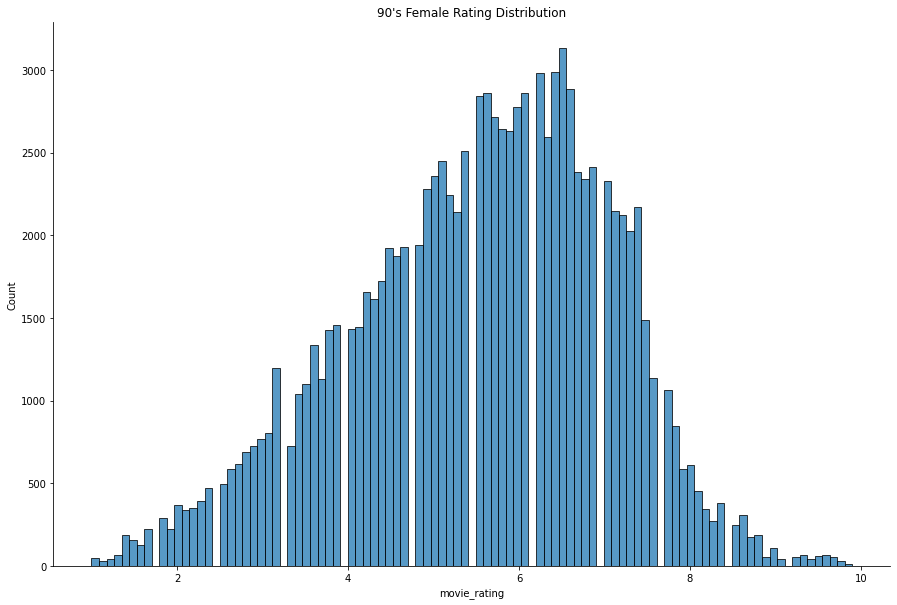

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Female Rating Distribution')
sns.histplot(analyze_f['movie_rating'])
sns.despine()
plt.show()

Distribusi untuk rating 0-4 dan 8-10 memiliki jumlah terendah dibandingkan dengan 5-7 dan data actress terlihat lebih runcing dibandingkan dengan data actor

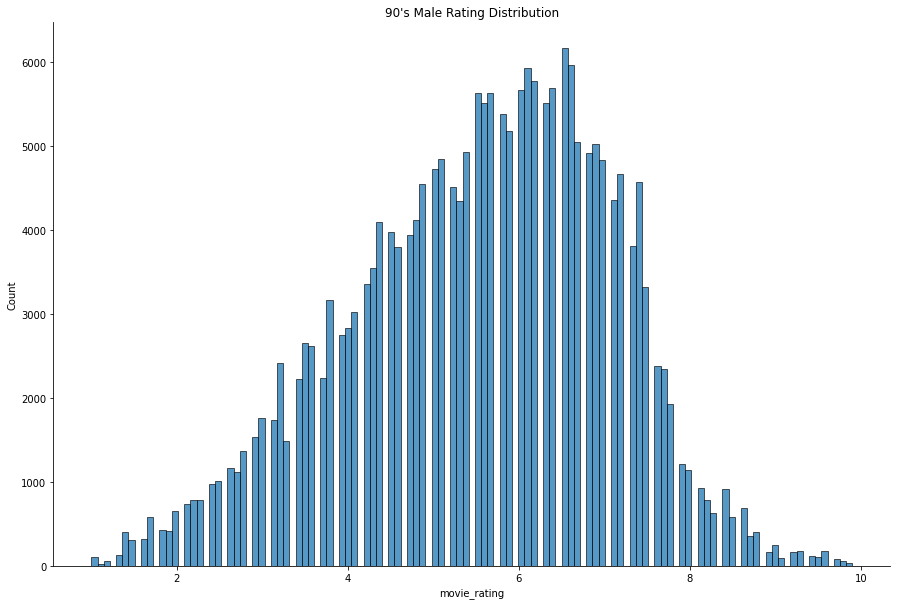

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Male Rating Distribution')
sns.histplot(analyze_m['movie_rating'])
sns.despine()
plt.show()

distribusi `movie_rating` pada data actor tidak terlalu runcing dan memiliki rating terbanyak pada skala rating 5-7

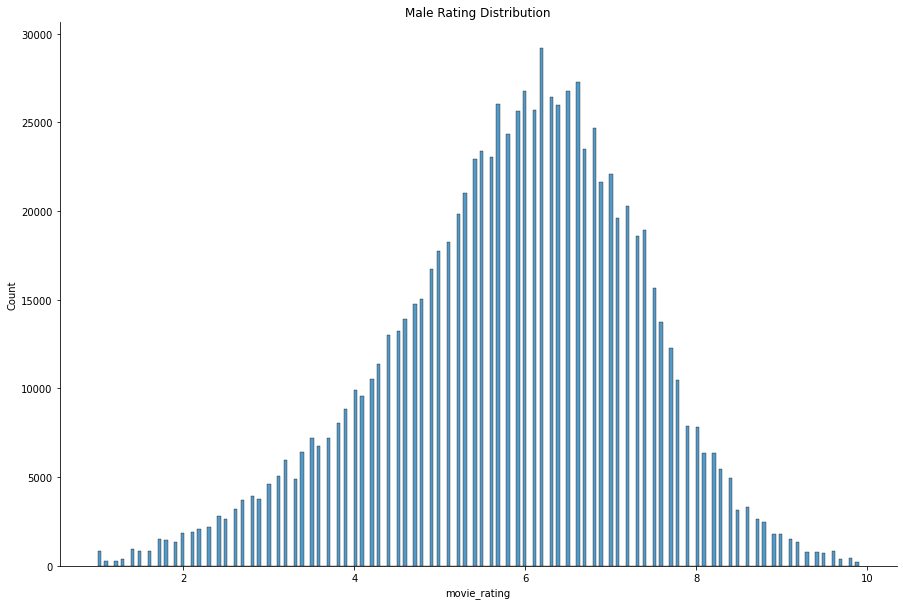

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Male Rating Distribution')
sns.histplot(analyze2['movie_rating'])
sns.despine()
plt.show()

terlihat untuk data `movie_rating` pada top aktor sepanjang masa memiliki rating dengan jumlah tertinggi pada rating 6

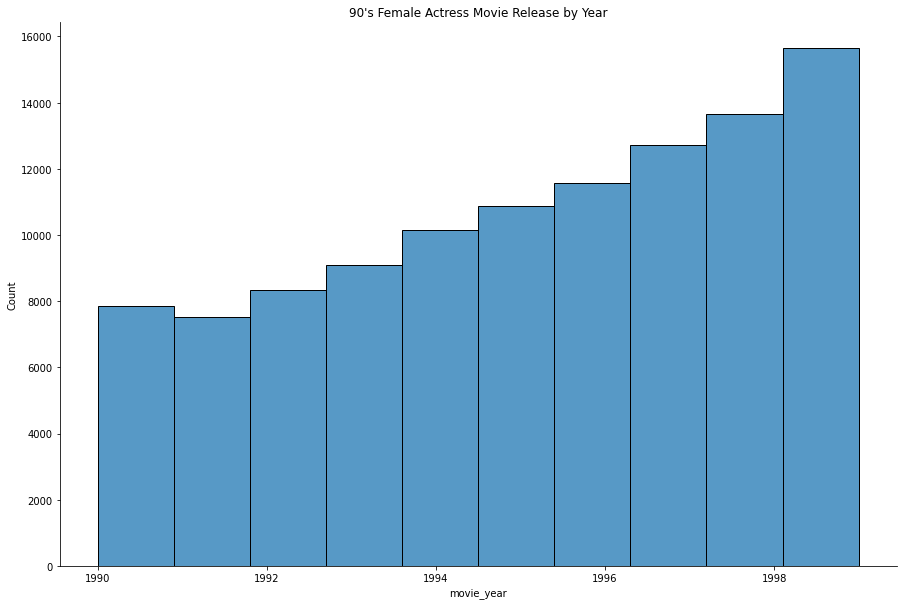

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Female Actress Movie Release by Year')
sns.histplot(analyze_f['movie_year'], bins=10)
sns.despine()
plt.show()

Terlihat bahwa setiap tahun jumlah film yang diperankan aktris meningkat

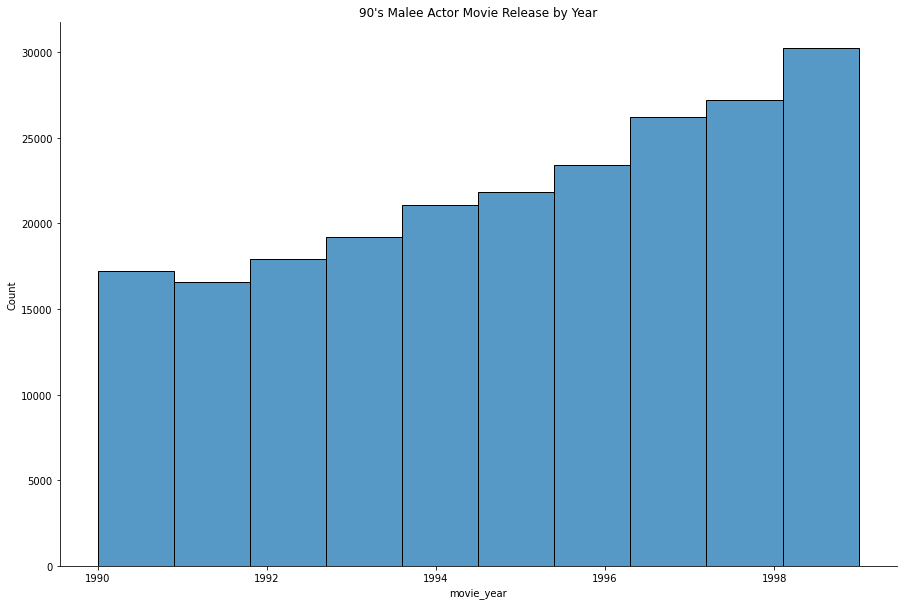

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Malee Actor Movie Release by Year')
sns.histplot(analyze_m['movie_year'], bins=10)
sns.despine()
plt.show()

Terlihat bahwa setiap tahun jumlah film yang diperankan aktor meningkat

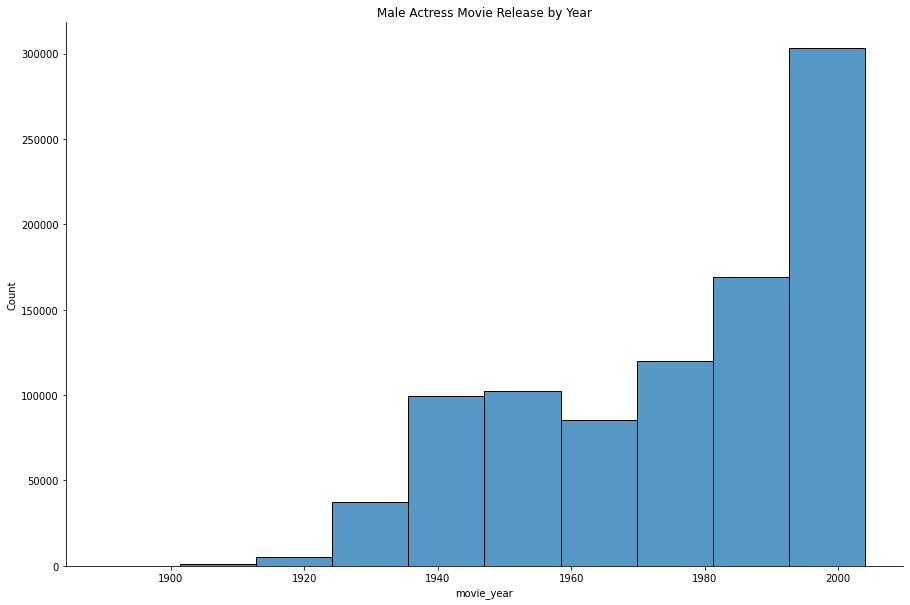

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Male Actress Movie Release by Year')
sns.histplot(analyze2['movie_year'], bins=10)
sns.despine()
plt.show()

pada tahun 2000-an film yang diperankan oleh aktor pria meningkat secara tajam

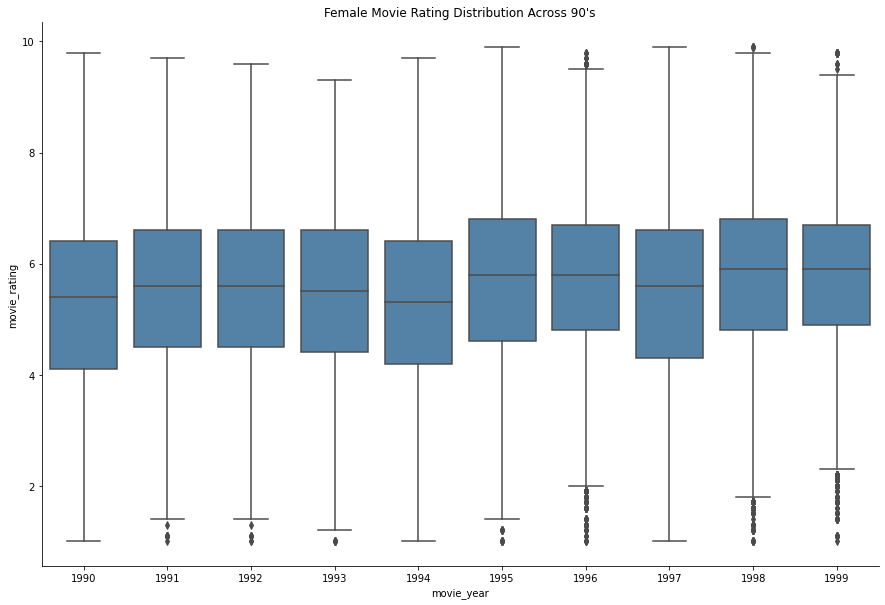

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Female Movie Rating Distribution Across 90\'s')
sns.boxplot(data=analyze_f, x='movie_year', y='movie_rating',
            color='steelblue')
sns.despine()
plt.show()

distribusi rating tiap tahunnya memiliki pola yang stagnan artinya tidak terlalu berubah dari tahun ke tahun namun pada beberapa tahun terakhir memiliki outlier yang minimum

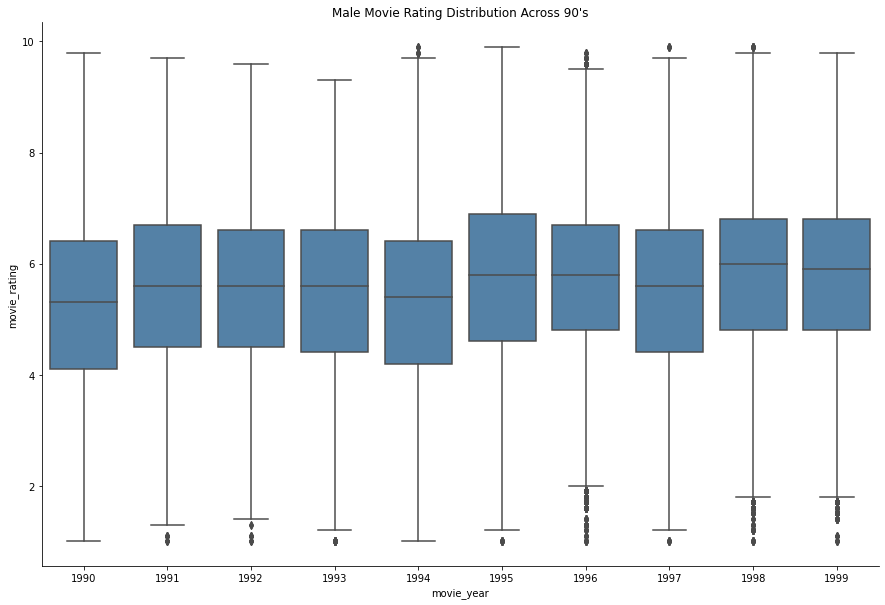

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Male Movie Rating Distribution Across 90\'s')
sns.boxplot(data=analyze_m, x='movie_year', y='movie_rating',
            color='steelblue')
sns.despine()
plt.show()

begitu pula dengan distribusi rating aktor pria tiap tahunnya memiliki pola yang stagnan artinya tidak terlalu berubah dari tahun ke tahun namun pada beberapa tahun terakhir memiliki outlier yang minimum

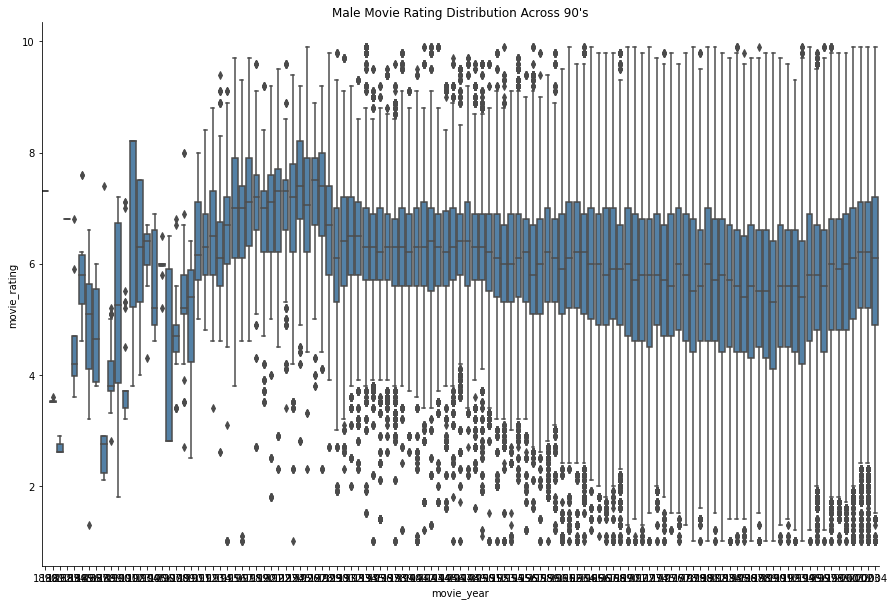

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Male Movie Rating Distribution Across 90\'s')
sns.boxplot(data=analyze2, x='movie_year', y='movie_rating',
            color='steelblue')
sns.despine()
plt.show()

untuk data aktor pria pada bussines statement ke-2 memiliki pola rating dimana pada tahun awal memiliki pola yang berubah2 dan range interquartile yang cukup kecil dikarenakan jumlah film pada saat itu tidak terlalu banyak lalu dilanjutkan dengan pola yang stagnan sampai tahun terakhir

In [ ]:
# group by director and generate scoring features
analyzer_f= analyze_f.groupby('actress_name').agg(movie_count=('movie_name', 'size'),
                                                movie_rating_mean=('movie_rating', 'mean'))\
                                                .reset_index()

In [ ]:
# group by director and generate scoring features
analyzer_m= analyze_m.groupby('actress_name').agg(movie_count=('movie_name', 'size'),
                                                movie_rating_mean=('movie_rating', 'mean'))\
                                                .reset_index()

In [ ]:
# group by director and generate scoring features
analyzer2=analyze2.groupby('actress_name').agg(movie_count=('movie_name', 'size'),
                                                movie_rating_mean=('movie_rating', 'mean'), max_year=('movie_year', 'max'), min_year=('movie_year', 'min'))\
                                                .reset_index()

In [ ]:
analyzer_m

,actress_name,movie_count,movie_rating_mean
0,!Nqate Xqamxebe,1,6.40
1,'Big Al' Solomon,1,2.60
2,'Big Philly' Johnson,1,4.80
3,'Big' Mike Burrelle,1,5.00
4,'Chiyaan' Vikram,1,8.30
...,...,...,...
116226,Þorsteinn Hannesson,1,5.40
116227,Þröstur Guðbjartsson,2,7.65
116228,Þröstur Leó Gunnarsson,1,6.00
116229,Þórir Baldursson,1,6.90


In [ ]:
analyzer_f

,actress_name,movie_count,movie_rating_mean
0,'Chicken' Klabunde,1,6.2
1,'Gypsy' Spheeris,1,5.1
2,'Jaman' Janet Manns,1,6.4
3,'Tex' Burk,1,5.0
4,A. Banshchikova,1,3.3
...,...,...,...
62866,Ülle Toming,1,8.2
62867,Þrúður Vilhjálmsdóttir,1,5.5
62868,Þóra Dungal,1,3.9
62869,Þóra Friðriksdóttir,1,7.8


In [ ]:
analyzer2

,actress_name,movie_count,movie_rating_mean,max_year,min_year
0,!Nqate Xqamxebe,2,7.05,2000,1997
1,'Amarillo Slim' Preston,1,6.30,1974,1974
2,'Arm' Suvinit Pornvalai,1,5.60,1988,1988
3,'Big Al' Solomon,1,2.60,1995,1995
4,'Big Daddy' Glen,1,4.10,1972,1972
...,...,...,...,...,...
295431,Þórhallur Sverrisson,2,4.65,2004,2000
295432,Þórir Baldursson,1,6.90,1996,1996
295433,Þórir Gunnar Jónsson,1,6.70,2002,2002
295434,Þórður Árnason,1,8.00,1982,1982


ditambahkan kolom experience/pengalaman yaitu tahun max - tahun min untuk mengetahui pengalaman masing-masing actor

In [ ]:
analyzer3=analyzer2

In [ ]:
analyzer2['experience'] = analyzer2.apply(lambda row: row.max_year - row.min_year, axis=1)

In [ ]:
analyzer2.sort_values(by='experience', ascending=False)

,actress_name,movie_count,movie_rating_mean,max_year,min_year,experience
268142,The King Cole Trio,22,6.422727,2003,1892,111
269008,Thomas A. Edison,3,5.733333,2002,1897,105
16462,Antoine Lumière,2,7.000000,1996,1895,101
174932,M. Winckler,2,7.000000,1996,1895,101
90263,Félicien Trewey,2,7.000000,1996,1895,101
...,...,...,...,...,...,...
117399,Izzy Goldfarb,1,1.800000,1989,1989,0
117400,Izzy Redman,1,2.000000,1990,1990,0
117401,Izzy Sanabria,1,3.800000,1983,1983,0
117403,Izzy Stradlin,1,5.700000,1988,1988,0


diketahui terdapat aktor yang memiliki pengalaman diatas 100 tahun

In [ ]:
analyzer2.sort_values(by='movie_count', ascending=False)

,actress_name,movie_count,movie_rating_mean,max_year,min_year,experience
188061,Mel Blanc,761,6.825887,2003,1937,66
167276,Lee Phelps,390,6.243846,1953,1920,33
119549,Jack Mower,282,6.110284,1959,1922,37
123089,James Flavin,281,6.248399,1971,1932,39
116015,Irving Bacon,278,6.215468,1956,1923,33
...,...,...,...,...,...,...
118289,Jac Hoffman,1,6.300000,1935,1935,0
118290,Jac McAnelly,1,6.700000,1984,1984,0
118291,Jac Nellemann,1,6.300000,1978,1978,0
118292,Jac Perac,1,4.900000,1985,1985,0


In [ ]:
dan juga terdapat actor yang memiliki jumlah film yang cukup banyak yaitu 761 film

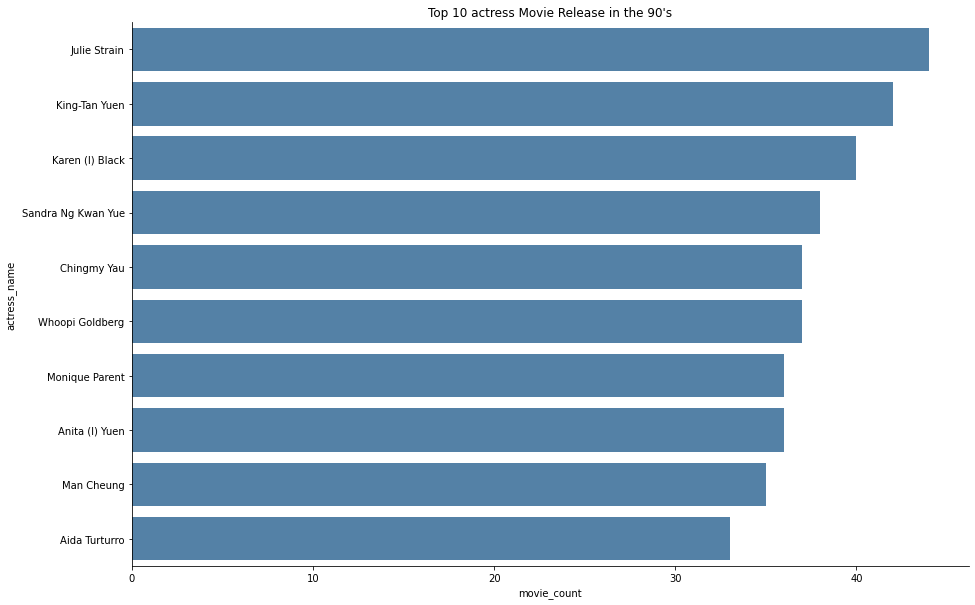

In [ ]:
actress_movie_count = analyzer_f.sort_values(by='movie_count', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 actress Movie Release in the 90\'s')
sns.barplot(data=actress_movie_count, x='movie_count', y='actress_name',
            color='steelblue', )
sns.despine()
plt.show()

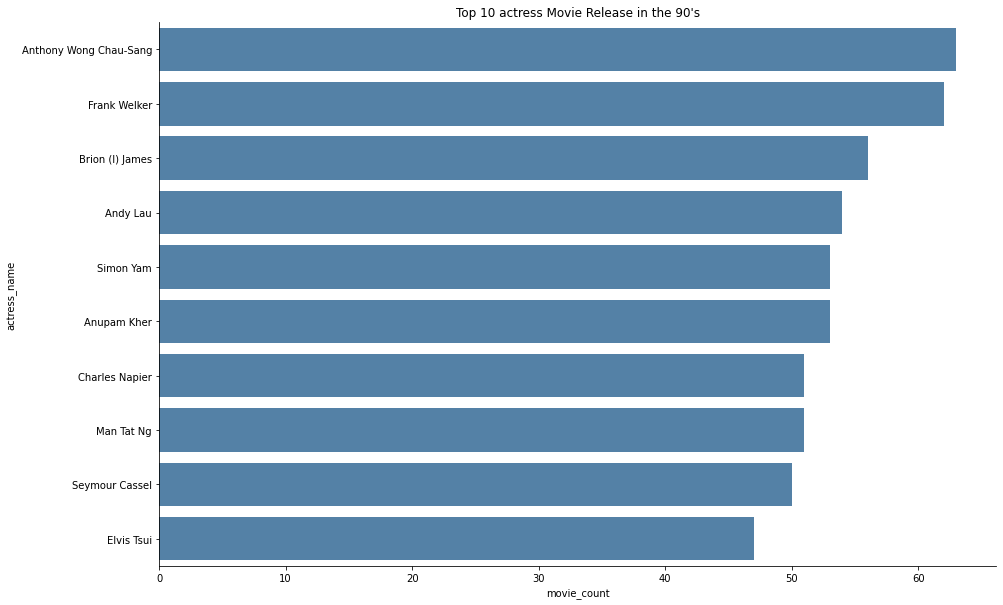

In [ ]:
actress_movie_count = analyzer_m.sort_values(by='movie_count', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 actress Movie Release in the 90\'s')
sns.barplot(data=actress_movie_count, x='movie_count', y='actress_name',
            color='steelblue', )
sns.despine()
plt.show()

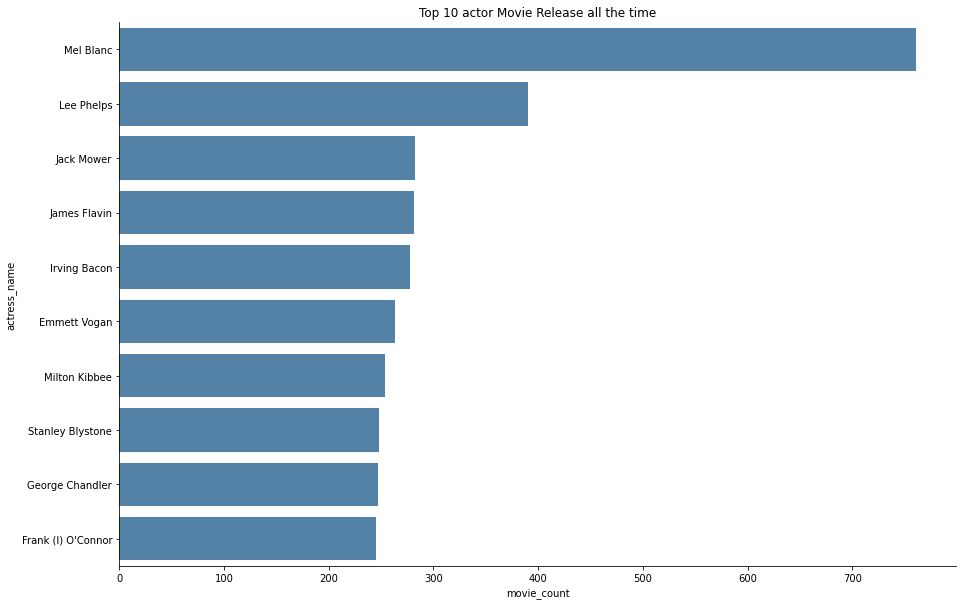

In [ ]:
actress_movie_count = analyzer2.sort_values(by='movie_count', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 actor Movie Release all the time')
sns.barplot(data=actress_movie_count, x='movie_count', y='actress_name',
            color='steelblue', )
sns.despine()
plt.show()

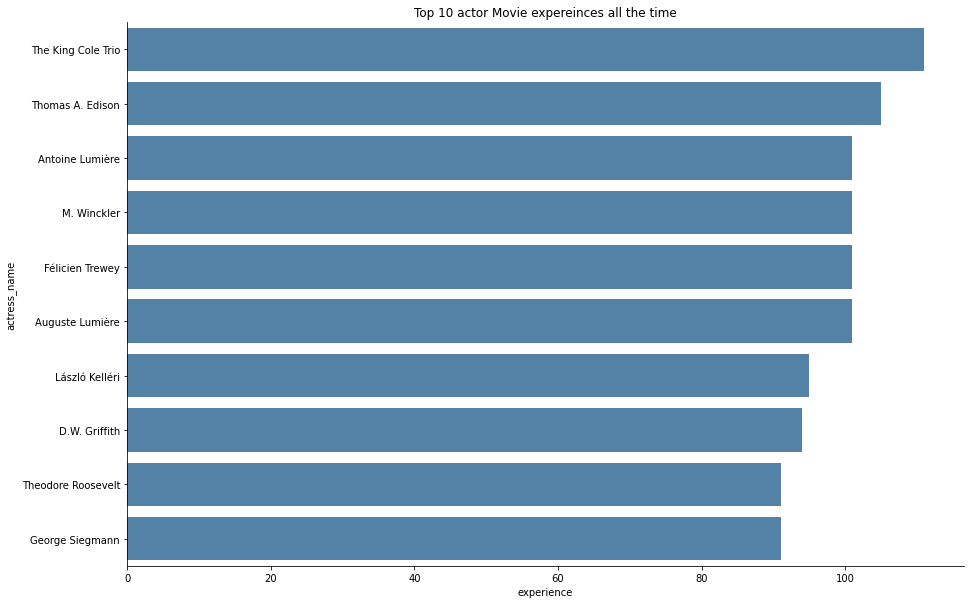

In [ ]:
actor_experience = analyzer2.sort_values(by='experience', ascending=False).head(10)

plt.figure(figsize=(15,10))
plt.title('Top 10 actor Movie expereinces all the time')
sns.barplot(data=actor_experience, x='experience', y='actress_name',
            color='steelblue', )
sns.despine()
plt.show()

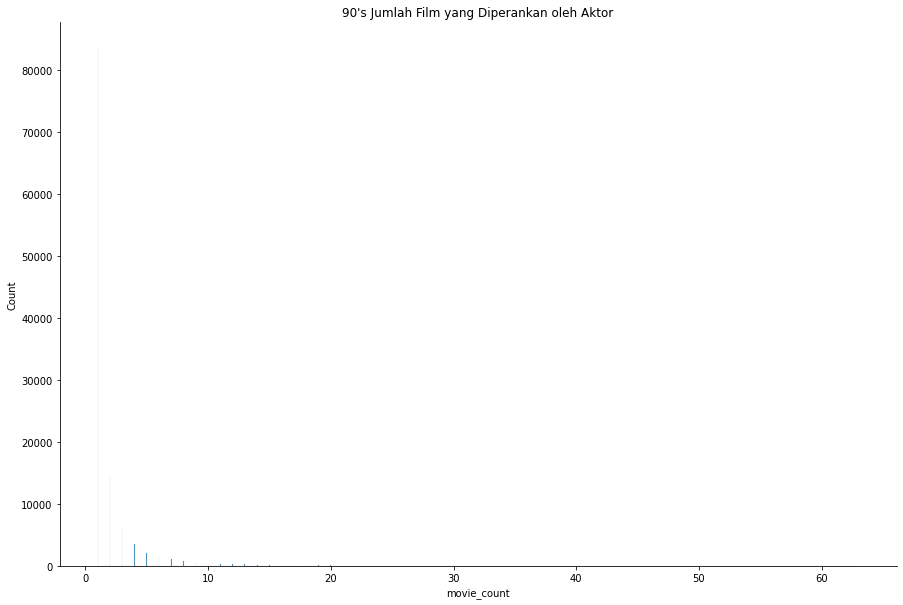

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Jumlah Film yang Diperankan oleh Aktor')
sns.histplot(analyzer_m['movie_count'])
sns.despine()
plt.show()

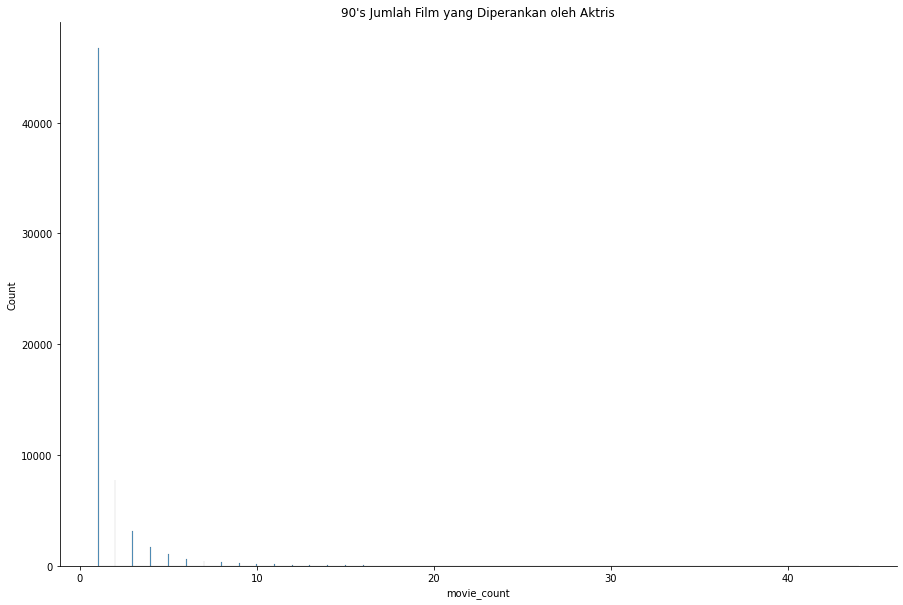

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Jumlah Film yang Diperankan oleh Aktris')
sns.histplot(analyzer_f['movie_count'])
sns.despine()
plt.show()

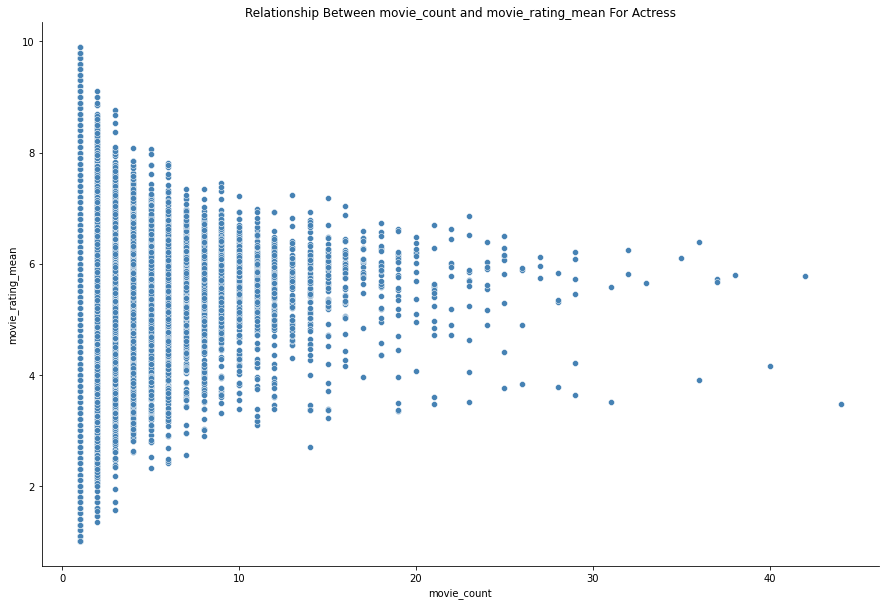

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship Between movie_count and movie_rating_mean For Actress')
sns.scatterplot(data=analyzer_f, x='movie_count', y='movie_rating_mean',
            color='steelblue')
sns.despine()
plt.show()

tidak ada hubungan yang signifikan antara jumlah film dengan rata-rata rating film

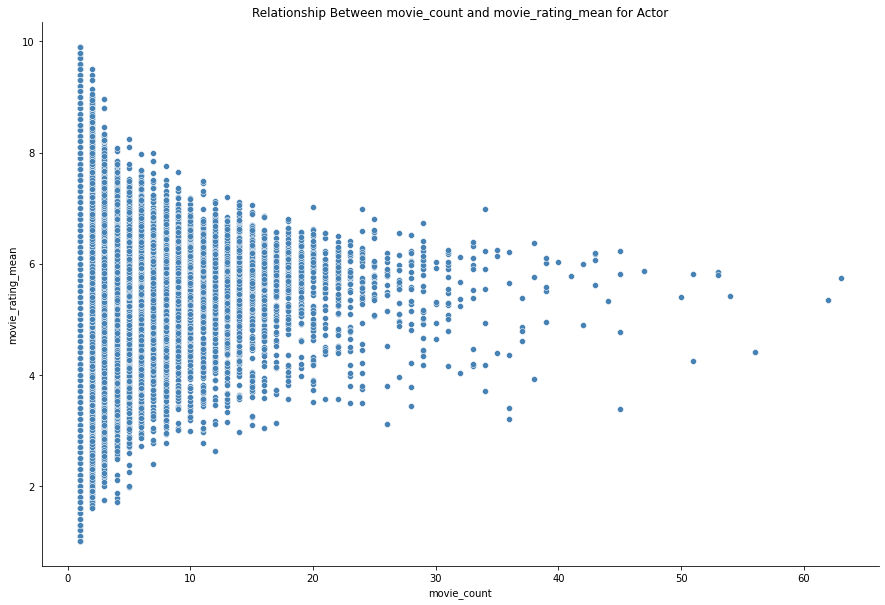

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship Between movie_count and movie_rating_mean for Actor')
sns.scatterplot(data=analyzer_m, x='movie_count', y='movie_rating_mean',
            color='steelblue')
sns.despine()
plt.show()

tidak ada hubungan yang signifikan antara jumlah film dengan rata-rata rating film

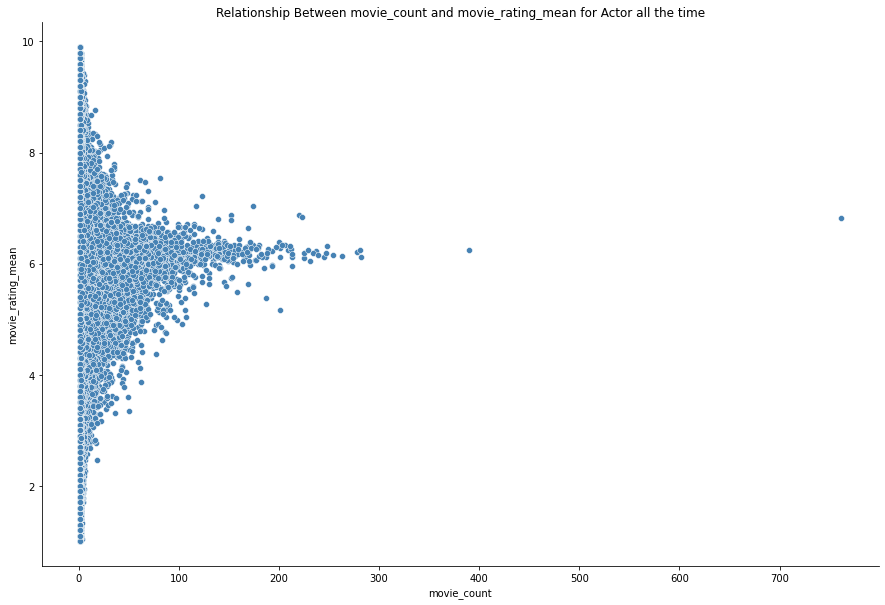

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship Between movie_count and movie_rating_mean for Actor all the time')
sns.scatterplot(data=analyzer2, x='movie_count', y='movie_rating_mean',
            color='steelblue')
sns.despine()
plt.show()

tidak ada hubungan yang signifikan antara jumlah film dengan rata-rata rating film

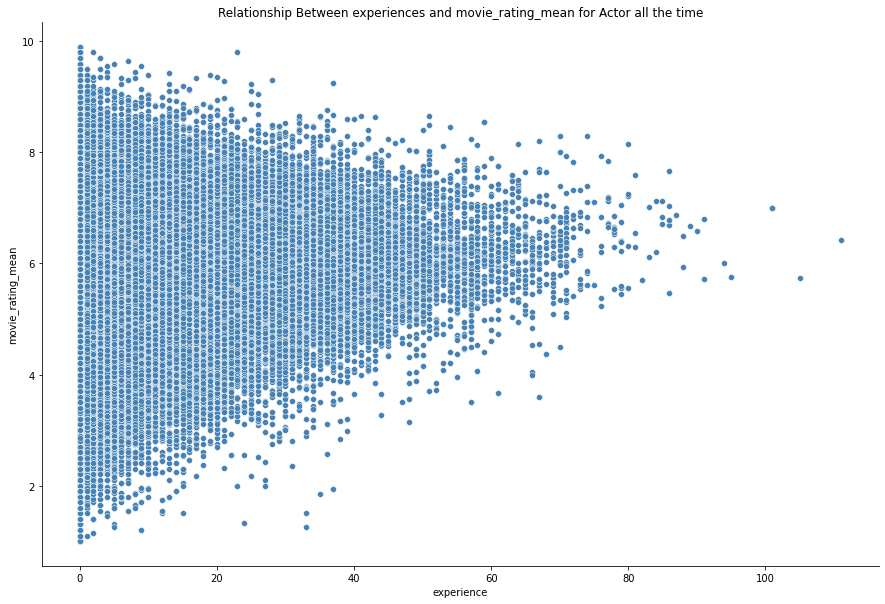

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship Between experiences and movie_rating_mean for Actor all the time')
sns.scatterplot(data=analyzer2, x='experience', y='movie_rating_mean',
            color='steelblue')
sns.despine()
plt.show()

tidak ada hubungan yang signifikan antara pengalaman dengan rata-rata rating film

#Kesimpulan

In [ ]:
analyzer_f.sort_values(by='movie_rating_mean', ascending=False)

,actress_name,movie_count,movie_rating_mean
17343,Ellen Schwiers,1,9.9
48055,Patricia Anne Isgate,1,9.9
62392,Yvonne Yvar,1,9.8
20622,Gibb Sisters,1,9.8
4721,Annie (II) Jones,1,9.8
...,...,...,...
43020,Michele Dehne,1,1.0
38958,Maria Brewer,1,1.0
16962,Elizabeth Brouilette,1,1.0
83,Ada Montellanico,1,1.0


In [ ]:
analyzer_m.sort_values(by='movie_rating_mean', ascending=False)

,actress_name,movie_count,movie_rating_mean
106707,Tim (I) Fox,1,9.9
946,Adnan Sami,1,9.9
89117,Randolf Kronberg,1,9.9
99045,Sean (II) Hughes,1,9.9
108052,Tom Denolf,1,9.9
...,...,...,...
39937,Gunnar Shogren,1,1.0
10869,Blagoje Marinkovic,1,1.0
55765,John Steakley,1,1.0
19933,Craig (I) Warner,1,1.0


In [ ]:
analyzer3["Rank"] = analyzer3[["movie_count","movie_rating_mean","experience"]].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

In [ ]:
analyzer3.sort_values(by="Rank")

,actress_name,movie_count,movie_rating_mean,max_year,min_year,experience,Rank
188061,Mel Blanc,761,6.825887,2003,1937,66,1
167276,Lee Phelps,390,6.243846,1953,1920,33,2
119549,Jack Mower,282,6.110284,1959,1922,37,3
123089,James Flavin,281,6.248399,1971,1932,39,4
116015,Irving Bacon,278,6.215468,1956,1923,33,5
...,...,...,...,...,...,...,...
269443,Thomas J. Crizer,1,1.000000,1915,1915,0,45103
48162,Clarence Mitchell,1,1.000000,1964,1964,0,45103
196682,Mikheil Vashadze,1,1.000000,1958,1958,0,45103
7811,Alex (II) Duncan,1,1.000000,1983,1983,0,45103


In [ ]:
nomineef = analyzer_f.sort_values(by='movie_rating_mean', ascending=False).iloc[:5,0]
winnerf = nomineef.iloc[0]

print('Nominasi Aktris Film Terbaik Tahun 90an:')
for i in nomineef:
  print('-',i)

print()
print('Aktris Film Terbaik Tahun 90an:\n-',winnerf)

Nominasi Aktris Film Terbaik Tahun 90an:
- Ellen Schwiers
- Patricia Anne Isgate
- Yvonne Yvar
- Gibb Sisters
- Annie (II) Jones

Aktris Film Terbaik Tahun 90an:
- Ellen Schwiers


In [ ]:
nomineem = analyzer_m.sort_values(by='movie_rating_mean', ascending=False).iloc[:5,0]
winnerm = nomineem.iloc[0]

print('Nominasi Aktor Film Terbaik Tahun 90an:')
for i in nomineem:
  print('-',i)

print()
print('Aktor Film Terbaik Tahun 90an:\n-',winnerm)

Nominasi Aktor Film Terbaik Tahun 90an:
- Tim (I) Fox
- Adnan Sami
- Randolf Kronberg
- Sean (II) Hughes
- Tom Denolf

Aktor Film Terbaik Tahun 90an:
- Tim (I) Fox


In [ ]:
nominee2 = analyzer3.sort_values(by='Rank').iloc[:3,0]
winner2 = nominee2.iloc[0]

print('Nominasi Aktor Film Terbaik Sepanjang Masa:')
for i in nominee2:
  print('-',i)

print()
print('Aktor Film Terbaik Sepanjang Masa:\n-',winner2)

Nominasi Aktor Film Terbaik Sepanjang Masa:
- Mel Blanc
- Lee Phelps
- Jack Mower

Aktor Film Terbaik Sepanjang Masa:
- Mel Blanc
